In [1]:
#Use-case : SMS Spam Classification
#Goal: You need to create a model that can predict whether the given sms is a spam or ham sms

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
data.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
# Since the dataset in balanced, for generalization we will use ACCURACY as the metric
# for quality we will use accuracy as well

In [11]:
# Seperate the data as features and label
# Will ensure they are in Numpy form

features = data.iloc[:,[0]].values
label = data.iloc[:,[1]].values

In [15]:
# Performing Text Preprocessing

# We will create a text preprocessing function that can perform teh following:
# 1. Remove Punctuations
# 2. Extract words out of the sentences
# 3. Normalize the data (lowercase)
# 4. Remove Stopwords

In [16]:
import string

text = "Welcome to Simplilearn! You are learning N.L.P."

#for char in text:
#  if char not in string.punctuation:
#    print(char)


''.join([char for char in text  if char not in string.punctuation])

'Welcome to Simplilearn You are learning NLP'

In [20]:
import nltk
from nltk.corpus import stopwords
import string

def textPreprocessing(document):
  #1. Remove Punctuations
  sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
  #2. Extract words out of the sentences
  words = sentWithoutPunct.split()
  #3. Normalize the data (lowercase)
  wordNormalized = [word.lower() for word in words]
  # 4. Remove Stopwords
  vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
  # 4. apply stemming
  
  # 5. Exclude those words with NER prop and perform stemming with other words
  

  return vocabulary



In [21]:
# Create BOW in SKlearn

from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocessing)

#Build the Vocabulary
finalWordVectorVocab = wordVector.fit(features)

In [22]:
finalWordVectorVocab.vocabulary_

{'wow...': 2572,
 'loved': 1350,
 'place.': 1723,
 'crust': 566,
 'good.': 1013,
 'tasty': 2264,
 'texture': 2287,
 'nasty.': 1507,
 'stopped': 2183,
 'late': 1284,
 'may': 1401,
 'bank': 235,
 'holiday': 1129,
 'rick': 1913,
 'steve': 2173,
 'recommendation': 1859,
 'it.': 1231,
 'selection': 2009,
 'menu': 1436,
 'great': 1027,
 'prices.': 1784,
 'getting': 986,
 'angry': 142,
 'want': 2486,
 'damn': 580,
 'pho.': 1702,
 'honeslty': 1133,
 'taste': 2257,
 'fresh.)': 945,
 'potatoes': 1765,
 'like': 1315,
 'rubber': 1933,
 'could': 536,
 'tell': 2273,
 'made': 1370,
 'ahead': 110,
 'time': 2329,
 'kept': 1257,
 'warmer.': 2491,
 'fries': 956,
 'too.': 2352,
 'touch.': 2363,
 'service': 2026,
 'prompt.': 1796,
 'would': 2568,
 'go': 998,
 'back.': 223,
 'cashier': 421,
 'care': 411,
 'ever': 800,
 'say': 1980,
 'still': 2176,
 'ended': 772,
 'wayyy': 2508,
 'overpriced.': 1625,
 'tried': 2377,
 'cape': 407,
 'cod': 482,
 'ravoli,': 1839,
 'chicken,': 454,
 'cranberry...mmmm!': 551,
 'd

In [70]:
# To create BOW
bagOfWords = finalWordVectorVocab.transform(features)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
bg = bagOfWords.data

In [24]:
# Apply TFIDF Algo on BOW to create a feature set

from sklearn.feature_extraction.text import TfidfTransformer
tfidfObject = TfidfTransformer().fit(bagOfWords)  #Calc IDF Values

In [25]:
# Lets create Numeric Feature set

processedFeatures = tfidfObject.transform(bagOfWords)

In [26]:
# Create Train Test Split (90% training -10% testing)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(processedFeatures,
                                                 label,
                                                 test_size=0.1,
                                                 random_state=1)



In [28]:
#Build a Model using LogisticRegression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.ravel())


LogisticRegression()

In [29]:
#Check whether the model is generalized or not
# considering SL= 0.35, CL = 0.65....train > test and test > CL
print("Training score is ",model.score(X_train,y_train))
print("Testing score is ",model.score(X_test,y_test))

Training score is  0.9766666666666667
Testing score is  0.78


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf_sel = RandomForestClassifier(n_estimators=100, random_state=10, class_weight='balanced_subsample')
clf_sel.fit(X_train, y_train.ravel())

print(
    "Accuracy on train data with top2 PC2 features: {:.2f}".format(
        clf_sel.score(X_train, y_train.ravel())
    )
)

print(
    "Accuracy on test data with top2 PC2 features: {:.2f}".format(
        clf_sel.score(X_test, y_test.ravel())
    )
)

Accuracy on train data with top2 PC2 features: 1.00
Accuracy on test data with top2 PC2 features: 0.73


In [41]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=10, class_weight='balanced', ccp_alpha=0.0005, criterion='entropy')
clf_DT.fit(X_train, y_train.ravel())
print('Train Score wth ccp_alpha (0.01055) : ', clf_DT.score(X_train, y_train))
print('Test Score wth ccp_alpha (0.01055) : ', clf_DT.score(X_test, y_test))
 

Train Score wth ccp_alpha (0.01055) :  0.9988888888888889
Test Score wth ccp_alpha (0.01055) :  0.71


In [42]:
clf_DT = DecisionTreeClassifier(random_state=10, class_weight='balanced')
path = clf_DT.cost_complexity_pruning_path(X_train, y_train.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.02748538011695917


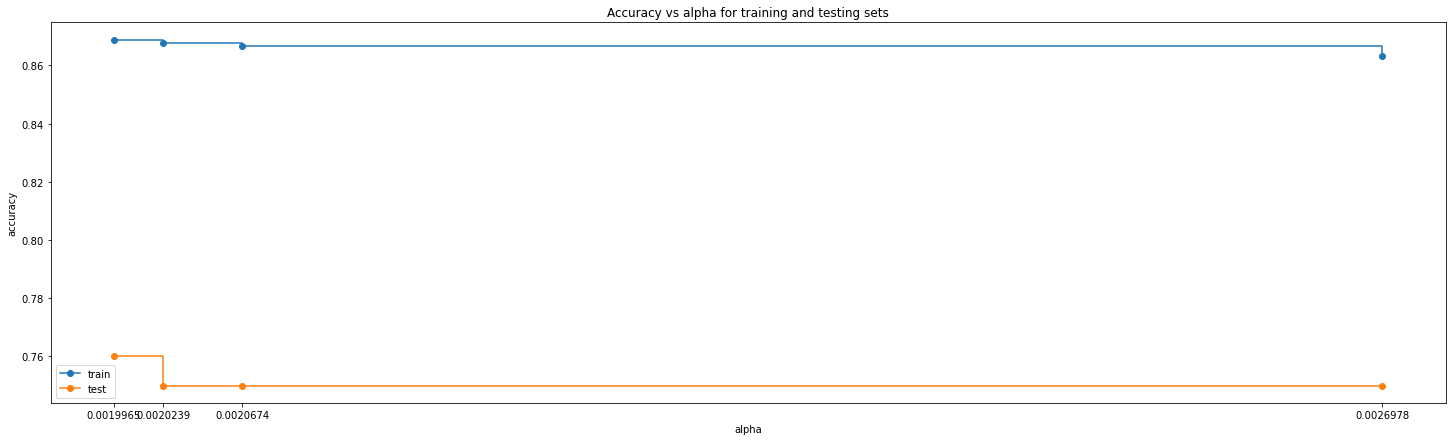

In [62]:
# dropping the last ccp_alpha scores since its with only root node and no leaves
train_scores =[clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

i = 31
j = 35

fig, ax = plt.subplots(figsize = (25, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[i:j], train_scores[i:j], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[i:j], test_scores[i:j], marker="o", label="test", drawstyle="steps-post")
ax.set_xticks(ccp_alphas[i:j])
ax.legend()
plt.show()

In [67]:
ccp_alpha = 0.001996
clf_DT = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha, class_weight='balanced')
clf_DT.fit(X_train, y_train)
print('Train Score wth ccp_alpha (0.001996) : ', clf_DT.score(X_train, y_train))
print('Test Score wth ccp_alpha (0.001996) : ', clf_DT.score(X_test, y_test))


Train Score wth ccp_alpha (0.001996) :  0.8722222222222222
Test Score wth ccp_alpha (0.001996) :  0.74


In [66]:
clf_sel = RandomForestClassifier(n_estimators=1000, random_state=10, ccp_alpha=ccp_alpha)
clf_sel.fit(X_train, y_train.ravel())

print(
    "Accuracy on train data: {:.2f}".format(
        clf_sel.score(X_train, y_train.ravel())
    )
)

print(
    "Accuracy on test data: {:.2f}".format(
        clf_sel.score(X_test, y_test.ravel())
    )
)

Accuracy on train data: 0.94
Accuracy on test data: 0.73


In [31]:
## no need for F1 score since data is balanced
# # Check whether the Quality of the model adheres the expected standards
# # considering SL = 0.45

# from sklearn.metrics import classification_report

# print(classification_report(label,model.predict(processedFeatures)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       500
           1       0.97      0.94      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [68]:
# Deploy# Deploy

smsInput = input("Enter Review: ")

# Preprocess the input

preProcessedFeature = textPreprocessing(smsInput)

#BOW

bowFeature = finalWordVectorVocab.transform(preProcessedFeature)

#TFIDF

processFeature = tfidfObject.transform(bowFeature)

#Predict

predLabel = clf_DT.predict(processFeature)[0]

print("Given Review is a {} review".format(predLabel))



Given Review is a 1 review
